### California price predict
Given California Houses prices data. This data contains information from the 1990 California census, it 
does provide an accessible introductory dataset the basics of regression models.<br>
The data pertains to the houses found in each California district and some summary stats about them 
based on the 1990 census data.

**Link of the data**
[California_Houses](https://drive.google.com/drive/folders/1VZM_IzvoZUKWrdUIhEadv4X9kflQW0gA)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

> ### Exploratory Data Analysis (EDA)

In [2]:
housing =  pd.read_csv("California_Houses.csv")
""" A quick description of the data, particularly the total number of rows, each attribute's type, and the number of non-null values."""
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [3]:
housing.describe() # Statistics Summary for numircal data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


> Split the data into **training set (70 %), Validation set (15%) and Test set (15 %).**

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.3, random_state = 42)
test_set, valid_set = train_test_split(test_set, test_size = 0.5, random_state = 42)
housing = train_set.copy()

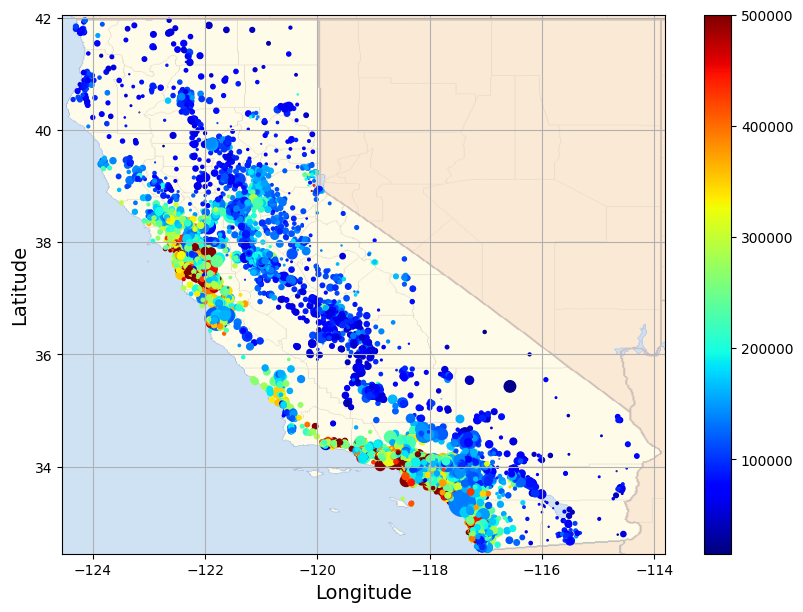

In [5]:
import matplotlib.image as mpimg

california_img = mpimg.imread('california.png')
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=housing["Population"] / 100,  # size of bubble
             c=housing["Median_House_Value"], # use house values for color mapping
             cmap="jet", colorbar=True, figsize=(10,7))

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

> California housing prices: **red** is expensive, **blue** is cheap, **larger circles** indicate areas with a larger population

- This image tells you that the housing prices are very much related to the location(close to the coast) 
and to the population density, as you probably knew already.
- Multiplying Latitude and Longitude creates a numerical value that can serve as a spatial indicator.
- and may It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers.

In [5]:
""" Look for correlations, compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. """
data_corr = housing.corr()
data_corr["Median_House_Value"].sort_values(ascending = False)

Median_House_Value          1.000000
Median_Income               0.688229
Tot_Rooms                   0.136423
Median_Age                  0.106549
Households                  0.065896
Tot_Bedrooms                0.050612
Population                 -0.024316
Distance_to_SanFrancisco   -0.035024
Distance_to_SanJose        -0.045524
Longitude                  -0.049347
Distance_to_SanDiego       -0.089448
Distance_to_LA             -0.128117
Latitude                   -0.141528
Distance_to_coast          -0.470888
Name: Median_House_Value, dtype: float64

#### Strong Correlation:
- Median_Income (0.689) → Strong positive correlation, meaning higher house values are strongly associated with higher income levels.
- Distance_to_coast (-0.47) → Moderate negative correlation, meaning houses closer to the coast tend to be more expensive.
#### Moderate and weak Correlation:
- Tot_Rooms (0.136) → Weak positive correlation, suggesting that the total number of rooms has little impact on house value.
- Households (0.066) → Very weak positive correlation.
- Latitude (-0.143) → Weak negative correlation, meaning house values may vary based on geographic location.
- Distance_to_LA (-0.130) → Weak negative correlation, indicating that houses closer to Los Angeles tend to have higher values.
- Median_Age (0.103) → Very weak positive correlation.
- Tot_Bedrooms (0.051) → Almost no correlation.
- Population (-0.023) → Negligible correlation.
- Distance_to_SanDiego / SanJose / SanFrancisco → All have weak negative correlations, implying that proximity to these cities has a limited impact on house values. <br>

#### **Conclusion**:
The most influential factor affecting house prices is median income.<br>
Proximity to the coast has a moderate impact, with house values decreasing as the distance from the coast increases.<br>
Other factors, such as the number of rooms, population, and distance from major cities, have minimal impact.<br>

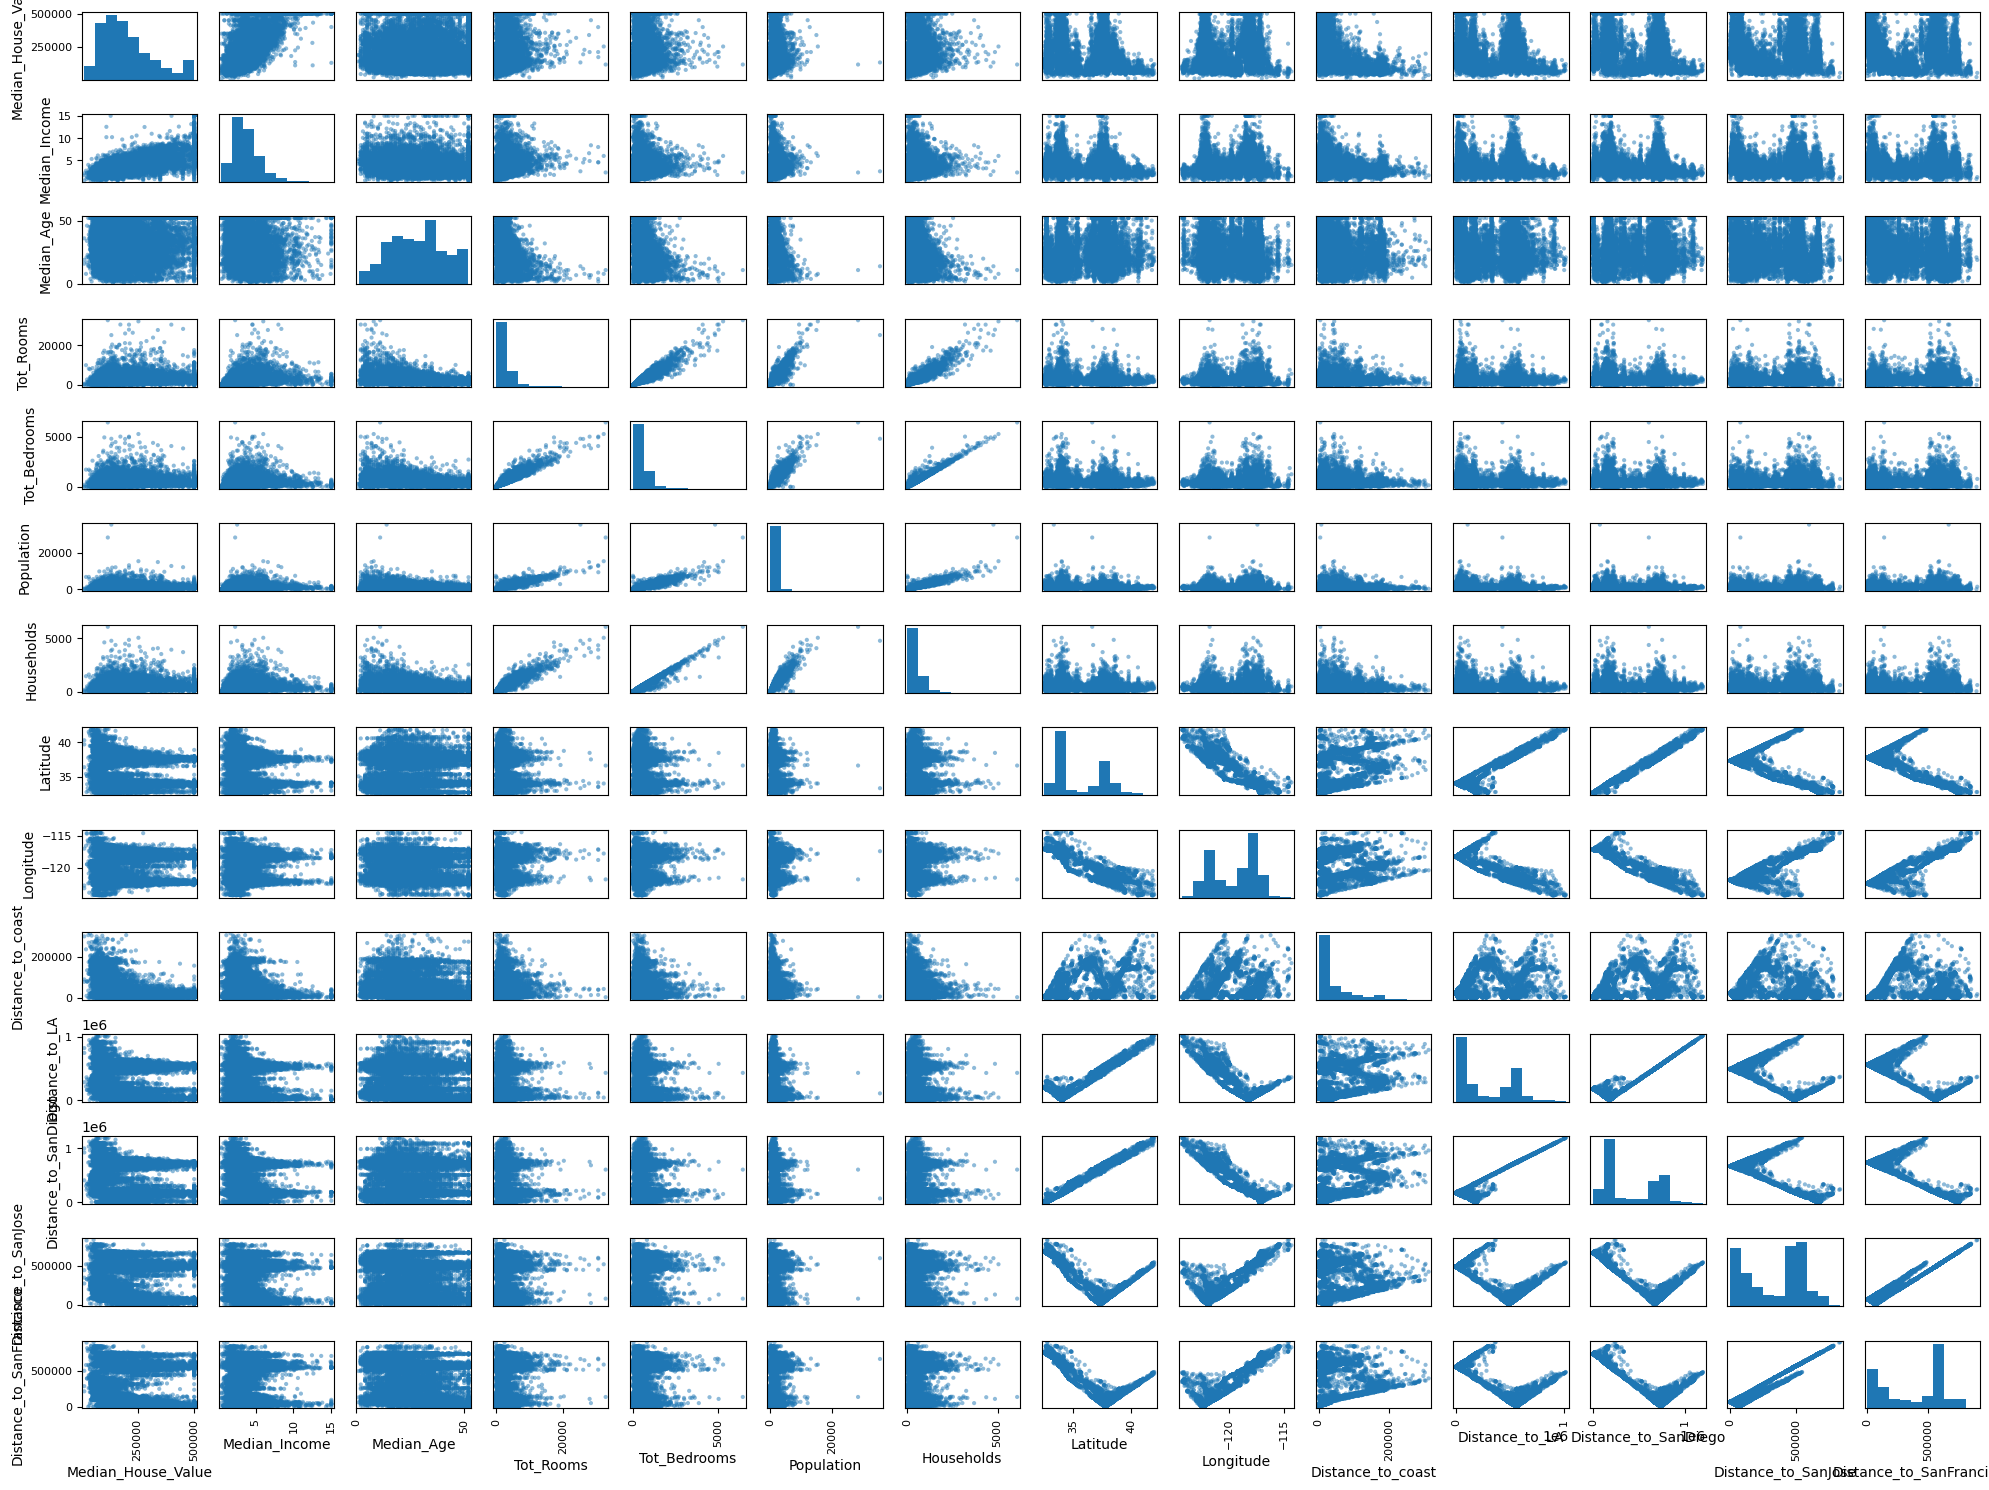

' show the correlation between all data '

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize = (20,15))
plt.tight_layout()
plt.show()
""" show the correlation between all data """

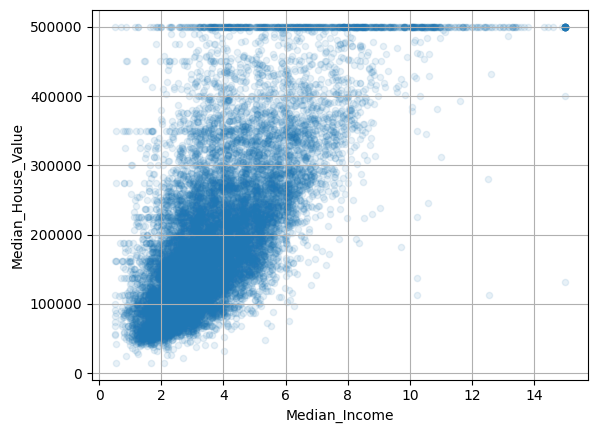

In [7]:
housing.plot(kind = "scatter", x = "Median_Income", y = "Median_House_Value", alpha = 0.1, grid = True)
plt.show()

This plot reveals a few things. 
- First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.
- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000.

**there is some attributes have a skewed-right distribution**

> ### **Feature Engineering**

In [10]:
housing["room_per_house"] = housing["Tot_Rooms"] / housing["Households"]
housing["bedrooms_ratio"] = housing["Tot_Bedrooms"] / housing["Tot_Rooms"]
housing["people_per_house"] = housing["Population"] / housing["Households"]
housing["Lat_Long"] = housing["Latitude"] * housing["Longitude"]
housing["Distance_to_city_center"] = housing[["Distance_to_SanFrancisco", "Distance_to_LA", "Distance_to_SanDiego", "Distance_to_SanJose"]].min(axis=1)

In [11]:
data_corr = housing.corr()
data_corr["Median_House_Value"].sort_values(ascending = False)

Median_House_Value          1.000000
Median_Income               0.688229
room_per_house              0.152106
Tot_Rooms                   0.136423
Median_Age                  0.106549
Lat_Long                    0.101711
Households                  0.065896
Tot_Bedrooms                0.050612
people_per_house           -0.020960
Population                 -0.024316
Distance_to_SanFrancisco   -0.035024
Distance_to_SanJose        -0.045524
Longitude                  -0.049347
Distance_to_SanDiego       -0.089448
Distance_to_LA             -0.128117
Latitude                   -0.141528
bedrooms_ratio             -0.250543
Distance_to_city_center    -0.435170
Distance_to_coast          -0.470888
Name: Median_House_Value, dtype: float64

**room_per_house (0.152106):**
- (Weak positive correlation.) -> More rooms per household might indicate larger homes, which can slightly increase house prices.

**bedrooms_ratio (-0.250543):**

- (Moderate negative correlation.) -> A higher bedroom-to-room ratio might indicate smaller or more crowded living spaces, often associated with lower house values.

**people_per_house (-0.020960):**

- (Very weak negative correlation.) -> More people per household could indicate overcrowding, but it doesn't have a strong impact on house value.

**Lat_Long (0.103621):**
- (Weak positive correlation.) -> This might suggest that certain geographical regions with specific latitude-longitude values have slightly higher house prices.

**Distance_to_city_center (-0.435170):**
- (Strong negative correlation.) -> Houses farther from major cities tend to have lower values, which is expected due to reduced access to economic opportunities and amenities.

**Key Takeaways:**
- Distance_to_city_center has the strongest correlation (negative), meaning proximity to a city significantly impacts house prices.
- bedrooms_ratio has a notable negative impact, suggesting that homes with more bedrooms relative to total rooms tend to be less valuable.
- room_per_house shows a slight positive correlation, indicating larger homes might be worth more.
- Lat_Long and people_per_house have weak correlations, suggesting they don’t contribute much individually to price variation.

In [12]:
housing = train_set.drop(["Median_House_Value"], axis = 1) 
housing_label = train_set["Median_House_Value"].copy() 

> ### **Check and Handle Outliers**

In [13]:
for col in housing:
    Q1 = housing[col].quantile(0.25)  
    Q3 = housing[col].quantile(0.75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing[(housing[col] < lower_bound) | (housing[col] > upper_bound)]
    print(f"Outliers of {col} is = {len(outliers)}")

Outliers of Median_Income is = 475
Outliers of Median_Age is = 0
Outliers of Tot_Rooms is = 913
Outliers of Tot_Bedrooms is = 916
Outliers of Population is = 835
Outliers of Households is = 862
Outliers of Latitude is = 0
Outliers of Longitude is = 0
Outliers of Distance_to_coast is = 1598
Outliers of Distance_to_LA is = 0
Outliers of Distance_to_SanDiego is = 0
Outliers of Distance_to_SanJose is = 0
Outliers of Distance_to_SanFrancisco is = 0


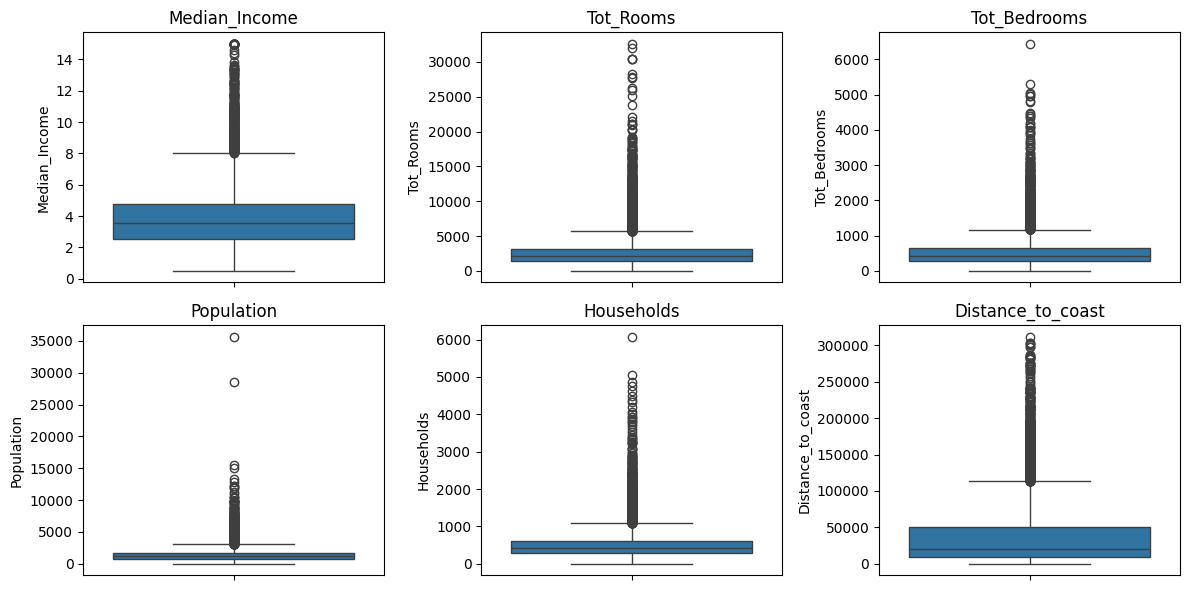

In [14]:
columns_with_outliers = ["Median_Income", "Tot_Rooms", "Tot_Bedrooms", "Population", "Households", "Distance_to_coast"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=housing[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

> ### **Data preprocessing Pipeline**

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

"""
making a custom transfrom that can help to transform training set and use it on valid and test.

the defualt pipeline is --> Pipeline([("any name of custom transformer", custom transformer)])
Pipeline requires all steps must be transformers except the last one 
can be anything: 
    • Clustering  
    • Transformer: behave like transformer. 
    • Predictor: will expose that method and given data x, use all step 
except the last to transform the data then, give the transformed data to the predict method. 
If you don't want to name the transformers, you can use the **make_pipeline()**, so we will use it 

and instead of using class inherites from BaseEstimator and TransformerMixin, we will use FunctionTransformer to simplify our code.

**ColumnTransformer** is used to apply different preprocessing pipelines to specific columns in your dataset.
This is useful when different types of transformations are required for different features.

NOTE => in ColumnTransformer all our old columns will disappear !!! so make sure that it won't effect on your model 
        by fit another one using old columns. 

**StandardScaler** is used to scale our numerical features into scale [-3 , 3] -->[x - mean()] / std()
"""

# compute the ratio of two columns 
def column_ratio(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()  # Convert DataFrame to NumPy array
    return x[:, [0]] / x[:, [1]]  # division of first column by the second

# generate output feature name for the ratio transformer
def ratio_name(function_transformer, feature_names_in):
    return [f"{feature_names_in[0]}_div_{feature_names_in[1]}"]

# compute the product of two columns
def column_multiply(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    return x[:, [0]] * x[:, [1]]  # multiplication of first column by the second

# compute the minimum value across multiple columns
def column_center(x):
    return np.min(x.to_numpy(), axis=1, keepdims=True) # from all columns get the minimum one

# Pipeline to compute the ratio of two columns and standardize the result
def ratio_pipline():
    return make_pipeline(
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

# Pipeline to compute the product of two columns and standardize the result
def multiply_pipline():
    return make_pipeline(
        FunctionTransformer(column_multiply, feature_names_out=lambda ft, fn: [f"{fn[0]}_mul_{fn[1]}"]),
        StandardScaler()
    )

# Pipeline to compute the minimum value among multiple columns and standardize the result
def center_pipline():
    return make_pipeline(
        FunctionTransformer(column_center, feature_names_out=lambda ft, fn: ["min_value"]),
        StandardScaler()
    )

# Pipeline to handle outliers and standardize the result
log_pipeline = make_pipeline(
    FunctionTransformer(np.log1p, inverse_func=np.expm1, feature_names_out="one-to-one"),
    StandardScaler()
)

# Default pipeline that only applies standardization
defualt_pipeline = make_pipeline(StandardScaler())

"""
==> force_int_remaonder_cols = False:
        The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
        At the moment the remainder columns are stored as indices (of type int).
        With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
        To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).
"""

# ColumnTransformer to apply different transformations to different columns
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipline(), ["Tot_Bedrooms", "Tot_Rooms"]),  # Compute bedroom-to-room ratio
    ("people_per_house", ratio_pipline(), ["Population", "Tot_Rooms"]),  # Compute people-per-room ratio
    ("room_per_house", ratio_pipline(), ["Tot_Rooms", "Households"]),  # Compute room-per-household ratio
    ("Lat_Long", multiply_pipline(), ["Latitude", "Longitude"]),  # Multiply latitude by longitude
    ("Distance_to_city_center", center_pipline(), ["Distance_to_SanFrancisco", "Distance_to_LA", "Distance_to_SanDiego", "Distance_to_SanJose"]),
    ("log", log_pipeline, columns_with_outliers)  # Apply log transformation to outlier columns
], remainder=defualt_pipeline, force_int_remainder_cols=False)  # Apply default pipeline to remaining columns


### **Train Our Model**

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# total pipeline and last one is estimator so this pipeline will act as estimator
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001DCB7DC2660>,
                                                                                       func=<function column_ratio at 0x000001DCC2F88AE0>)),
                                                                  ('stan...
                                                   'Distance_to_SanDiego',
                                                   'Distance_to_SanJose']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Median_Income', 'Tot_Rooms',
                                                   'Tot_Bedrooms', 'Population',
                                                   'Households',
                                                   'Distance_to_coast'])])),
                ('linearregression', LinearRegression())])

In [17]:
# all our new feature names
preprocessing.get_feature_names_out()

array(['bedrooms__Tot_Bedrooms_div_Tot_Rooms',
       'people_per_house__Population_div_Tot_Rooms',
       'room_per_house__Tot_Rooms_div_Households',
       'Lat_Long__Latitude_mul_Longitude',
       'Distance_to_city_center__min_value', 'log__Median_Income',
       'log__Tot_Rooms', 'log__Tot_Bedrooms', 'log__Population',
       'log__Households', 'log__Distance_to_coast',
       'remainder__Median_Age'], dtype=object)

#### **Evaluate Our Model Using MSE and MAE**

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_mse

4690487847.747446

In [20]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68487.13636696636)

In [19]:
lin_mae = mean_absolute_error(housing_label, housing_predictions)
lin_mae

50993.43305686024

> #### This model is **underfitting** the training data.

when this happens it can mean that the features don't provide enough information to make good predictions, or that the model isn't powerful enough 

**fix underfitting:** 
   - select a more powerful model, to feed the training algorithm with better features
   - reduce the constraints on the model, but this model is regularized
   - you could try to add more features.

#### we will add more features by transform to Polynomial x^2 or x^3 ...etc (Using PolynomialFeatures(degree = ) from Scikit-learn)   

In [21]:
from sklearn.preprocessing import PolynomialFeatures

lin_reg = make_pipeline(preprocessing, PolynomialFeatures(degree=2, include_bias = False) , LinearRegression())#include_bias = False because lin_reg add bias(two bias if True)
lin_reg.fit(housing, housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001DCB7DC2660>,
                                                                                       func=<function column_ratio at 0x000001DCC2F88AE0>)),
                                                                  ('stan...
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Median_Income', 'Tot_Rooms',
                                                   'Tot_Bedrooms', 'Population',
                                                   'Households',
                                                   'Distance_to_coast'])])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [22]:
housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_mse

3372491749.3265905

In [23]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(58073.15859608973)

In [24]:
lin_mae = mean_absolute_error(housing_label, housing_predictions)
lin_mae

41545.473485359966

#### As we can see the **MSE, MAE and RMSE** decreased !! 

Choosing the right degree is about finding a balance between **Underfitting** and **Overfitting**.
- If the degree is **too low**, the model stays too simple and won’t fit the data well (**Underfitting**).
- If it’s **too high**, the model becomes overly complex and starts fitting the noise in the data (**Overfitting**).

#### But how you can decide??
1. Start with a Small Value (like 2 or 3):
    - Begin with degree 2 (Quadratic) or 3 (Cubic). These are often sufficient to capture non-linear relationships without overcomplicating the model.
2. Use Cross-Validation:
    - Split your data into training and validation sets.(and we already split it)
    - Test different degrees ( 1, 2, 3, 4) and compare the model’s performance on the validation set using a metric like Mean Squared Error (MSE) or R² Score.
    - The degree that gives the best performance on the validation set (without being overly good on the training set alone) is likely the best choice.
3. Plot Learning Curves:
    - If you have time, plot learning curves for the model with different degrees.
    - If you see the error on both training and validation sets decreasing as the degree increases, but after a certain point the validation error starts rising, that’s the point of Overfitting. Choose the degree just before that.
4. Regularization (Optional):
    - If you’re worried about Overfitting with higher degrees, use a model like Ridge Regression or Lasso with PolynomialFeatures. These help reduce the impact of unnecessary features.

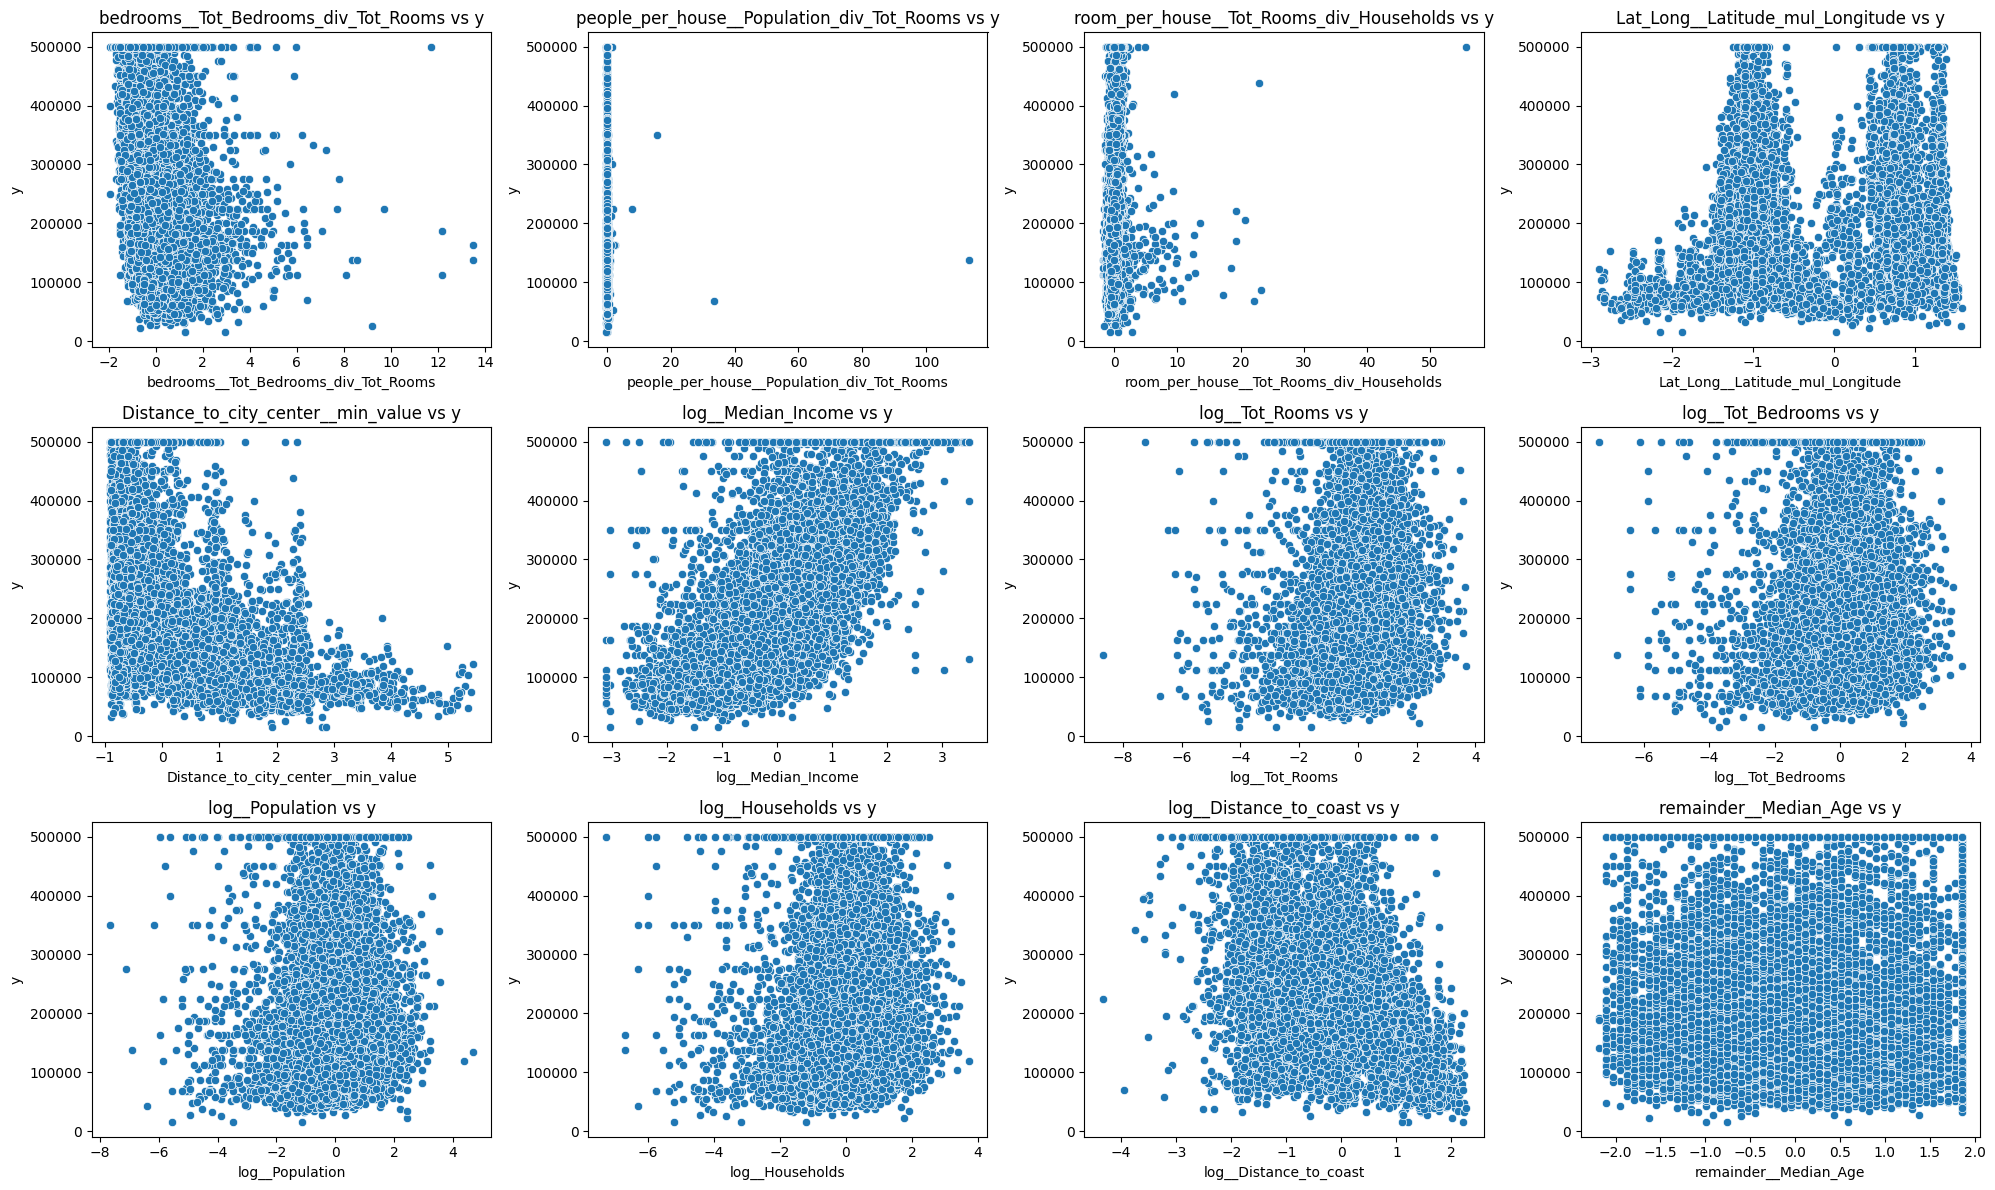

In [25]:
housing_transformed = pd.DataFrame(preprocessing.fit_transform(housing) , columns = preprocessing.get_feature_names_out())
num_features = len(housing_transformed.columns)
cols = 4 
rows = int(np.ceil(num_features / cols))  
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.ravel()

for i, col in enumerate(housing_transformed.columns):
    sns.scatterplot(x=housing_transformed[col].values.ravel(), y=housing_label.values.ravel(), ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("y")
    axes[i].set_title(f"{col} vs y")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout() 
plt.show()


### Determine the Degree Based on the Plots:
##### Analyze the Shape of the Relationship:
- If the relationship between a feature and y is nearly linear, a degree=1 is sufficient.
- If the relationship is a simple curve (a parabola or U-shape), a degree=2 (quadratic) is appropriate.
- If the relationship is more complex (multiple waves or sharp changes), a degree=3 or higher might be needed.
- If there’s no clear pattern (random scatter), the feature might not be strongly predictive or may need further transformation.

1. beds_per_room vs y
    - The relationship is a simple non-linear pattern (plateau-like). degree=2 should be sufficient to capture this change.
2. people_per_house vs y
    - The relationship is non-linear but not complex. degree=2 is appropriate.
3. room_per_house vs y
    - The relationship is a simple non-linear pattern. degree=2 is sufficient.
4. Lat_Long vs y
    - The relationship is non-linear with noticeable clusters. degree=2 or degree=3 could work to capture these patterns.
5. Distance_to_city_center_min_value vs y
    - The relationship is a strong non-linear pattern (downward curve). degree=2 is sufficient, but degree=3 could be tried for better precision.
6. log_Median_Income vs y
    - The relationship is non-linear (upward curve with diminishing returns). degree=2 is sufficient to capture this shape.
7. log_Tot_Rooms vs y
    - The relationship is a simple non-linear pattern. degree=2 is adequate.
8. log_Tot_Bedrooms vs y
    - degree=2 is appropriate.
9. log_Population vs y
    - The relationship is non-linear. degree=2 is sufficient.
10. log_Households vs y
    - degree=2 is adequate.
11. log_Distance_to_coast vs y
    - The relationship is a strong non-linear pattern (downward curve). degree=2 is sufficient, but degree=3 might improve accuracy if needed.
12. remainder_Median_Age vs y
    - The relationship is very weak. degree=1 or 2 at most.

**Conclusion from the Plots:**
- Simple Non-Linear Relationships: Most features (e.g., log_Median_Income, log_Distance_to_coast, Distance_to_city_center_min_value) show simple non-linear patterns (curves or plateaus). degree=2 should be sufficient to capture these relationships.
- More Complex Relationships: Features like Lat_Long and Distance_to_city_center_min_value show more pronounced changes (clusters or strong curves). degree=3 could be considered for these.
- Weak Relationships: Features like remainder_Median_Age and log_Population show little to no pattern, so degree=1 or 2 is adequate.

In [26]:
from sklearn.model_selection import cross_val_score

housing_valid = valid_set.drop(["Median_House_Value"], axis = 1) 
housing_valid_label = valid_set["Median_House_Value"].copy() 

degrees = [1, 2, 3, 4]

for degree in degrees:
    """
    Training Error (Train MSE) - To measure how well the model learns from training data.
    Validation Error (Validation MSE) - To see how well the model generalizes to unseen data.
    Cross-Validation Error (Cross-Validation MSE) - To get a more stable estimate of the model's performance across different data splits.
    """
    lin_reg = make_pipeline(preprocessing, PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    lin_reg.fit(housing, housing_label)
    
    train_predictions = lin_reg.predict(housing)
    train_mse = mean_squared_error(housing_label, train_predictions)
    
    val_predictions = lin_reg.predict(housing_valid)
    val_mse = mean_squared_error(housing_valid_label, val_predictions)

    print(f"Degree {degree}:")
    print(f"  Train MSE = {train_mse}")
    print(f"  Validation MSE = {val_mse}")


Degree 1:
  Train MSE = 4690487847.747446
  Validation MSE = 4443449603.185265
Degree 2:
  Train MSE = 3372491749.3265905
  Validation MSE = 3333762968.6158514
Degree 3:
  Train MSE = 2731073695.9321413
  Validation MSE = 883595165399.616
Degree 4:
  Train MSE = 2011360761.9488714
  Validation MSE = 2863186289579368.0


#### **How to Analyze the Results**
1. Is the model underfitting?
    - If both Train MSE and Validation MSE are high, the model is too simple (Degree 1).
2. Is the model well-fitted?
    - If Train MSE is low and Validation MSE is not significantly higher, the model is balanced.
3. Is the model overfitting?
    - If Train MSE is very low but Validation MSE is significantly higher, the model is too complex.


- Degree 1 (Linear Model)
    - Train MSE = 4.69 billion
    - Validation MSE = 4.44 billion
  
- Degree 2 (Quadratic Model)
    - Train MSE = 3.37 billion (Improvement compared to Degree 1)
    - Validation MSE = 3.33 billion (Also improved, meaning the model performs better on validation data)

- Degree 3 (Cubic Model)
    - Train MSE = 2.73 billion (Further improvement on training data)
    - Validation MSE = 883 billion (Huge jump compared to training, indicating overfitting)

- Degree 4 (Quartic Model)
    - Train MSE = 2.01 billion (Lowest training error, meaning the model learns the training data very well)
    - Validation MSE = 2.86 × 10¹⁵ (Total collapse on validation data)
    
What’s the Solution?
- Choose Degree 2 with Regularization (Ridge, Lasso, ElasticNet)
    - Ridge Regression (L2) and Lasso Regression (L1) help reduce complexity and prevent overfitting.

Final Verdict
- Degree 1 is stable but may underfit.
- Degree 2 (with regularization) is likely the best option.
- Degrees 3 & 4 lead to extreme overfitting and model failure.


In [27]:
def plot_learning_curve(model, name ="Linear Regression"):
    """
    Plot Learning Curves:
    - If you have time, plot learning curves for the model with different degrees.
    - If you see the error on both training and validation sets decreasing as the degree increases,
    but after a certain point the validation error starts rising, that's the point of Overfitting. Choose the degree just before that.
    """
    train_sizes = np.linspace(0.1, 1.0, 10) # [0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0]
    train_errors = []
    val_errors = []

    for size in train_sizes:
        n_samples = int(size * len(housing)) # 10% sample of all data
        X_train_subset = housing[:n_samples]
        y_train_subset = housing_label[:n_samples]
        
        model.fit(X_train_subset, y_train_subset)
        
        y_train_pred = model.predict(X_train_subset)
        train_err = mean_squared_error(y_train_subset, y_train_pred)
        train_errors.append(train_err)
        
        y_val_pred = model.predict(housing_valid)
        val_err = mean_squared_error(housing_valid_label, y_val_pred)
        val_errors.append(val_err)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes * len(housing), train_errors, "r-+", linewidth=2, label="Train MSE")
    plt.plot(train_sizes * len(housing), val_errors, "b-o", linewidth=2, label="Validation MSE")
    plt.xlabel("Training Set Size (Number of Samples)")
    plt.ylabel("MSE")
    plt.title(f"Learning Curve - {name}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
    print("Training MSE:", train_errors)
    print("Validation MSE:", val_errors)

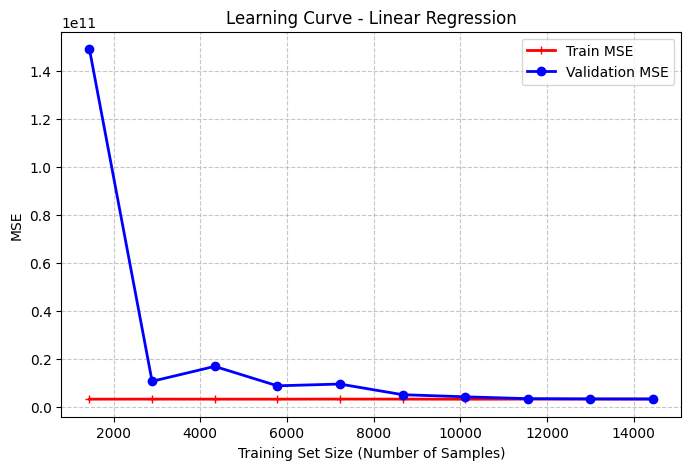

Training MSE: [3292726535.746571, 3300986998.533854, 3293200682.636981, 3287108009.2886696, 3320981648.188744, 3308050027.381007, 3263689654.705104, 3307632395.6180744, 3352980084.5521274, 3372491749.3265915]
Validation MSE: [148901528741.07367, 10720623346.950445, 16930054588.189438, 8847014695.835901, 9575995681.027649, 5146200882.189792, 4267986421.274328, 3495228249.1286626, 3372131160.364254, 3333762968.6157103]


In [ ]:
lin_reg = make_pipeline(preprocessing, PolynomialFeatures(degree=2, include_bias=False), StandardScaler(), LinearRegression())
plot_learning_curve(lin_reg)

- If both Training & Validation MSE are high → Model is underfitting (increase model complexity).
- If Training MSE is much lower than Validation MSE → Model is overfitting (use more regularization).
- If both MSEs are low and close → Model generalizes well (ideal case).

#### **This model is overfitting the data** 

> ### **Regularization (Ridge, Lasso, ElasticNet)**

### Ridge Regularization

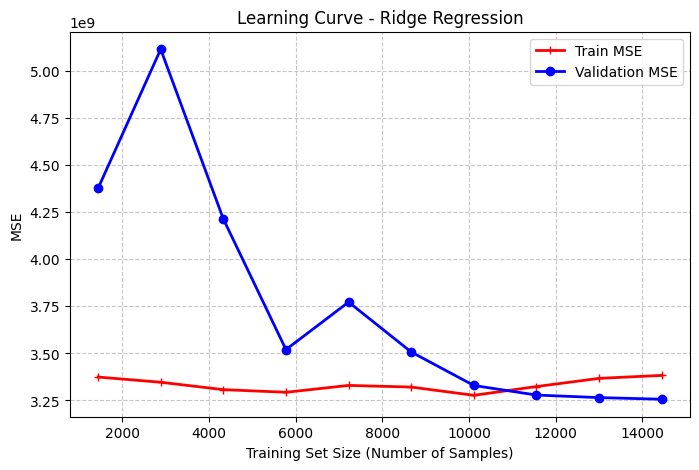

Training MSE: [3374523145.2935667, 3346814040.7608833, 3307552943.094076, 3293582952.717528, 3329969431.692025, 3321342374.5002027, 3277476054.4456224, 3324026082.7507954, 3367491316.574669, 3383258904.181795]
Validation MSE: [4377156617.471554, 5116237512.699048, 4214423108.52925, 3520413363.5347886, 3772800323.3271585, 3507657308.474412, 3329750894.480214, 3278729783.8152885, 3265327664.453848, 3256688133.3773685]


In [33]:
ridge_reg = make_pipeline(preprocessing, PolynomialFeatures(degree=2, include_bias=False), StandardScaler() ,Ridge(alpha=0.1))
plot_learning_curve(model = ridge_reg, name = "Ridge Regression")

### Learning Curve Analysis:
- **Train MSE is low and stable:**
    - This indicates that the model is learning well from the training data.
    - The fact that it remains relatively constant suggests that Ridge Regularization is effectively preventing overfitting.

- **Validation MSE was high at first but decreased as the training set size increased**
    - When the dataset was small, the model suffered from overfitting (higher variance).
    - However, as more data was used, the validation error dropped and approached the training error, meaning the model generalizes better now.

> ### **Search for best alpha**

In [34]:
"""
Higher alpha (100, 1000) → More regularization (simpler model, less overfitting, but may underfit)
Lower alpha (0.1, 1) → Less regularization (more complex model, risk of overfitting)

How to Decide?
If Validation MSE is close to Train MSE but Cross-Validation MSE is too high, increase alpha to reduce overfitting.
If Train MSE is much lower than Validation MSE, increase alpha to simplify the model.
If all errors are very high, decrease alpha to allow the model to learn better patterns.


Choose the alpha where Validation & Cross-Validation MSE are lowest and closest to Train MSE.

So we will try different alpha with different degrees.
"""
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [10, 50, 100, 500, 1000]
}

ridge_pipeline = make_pipeline(
    preprocessing,
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    Ridge()
)

grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing, housing_label)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 1000}


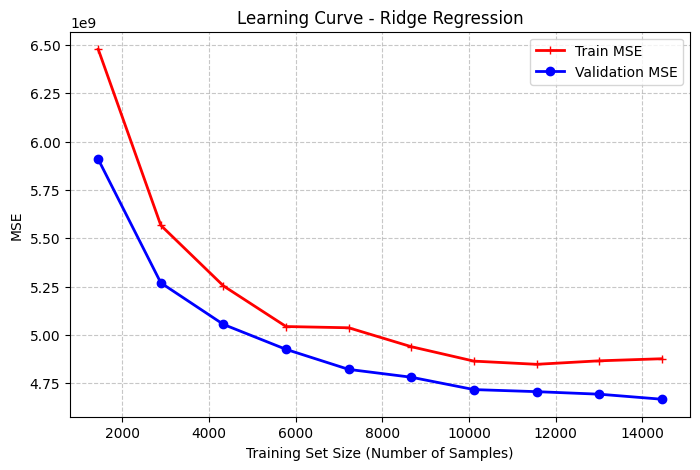

Training MSE: [6477550106.182727, 5566515287.068541, 5253219691.154167, 5043119633.296871, 5036681916.919241, 4938772342.563738, 4864180126.659746, 4847732633.558695, 4865789520.20399, 4876554814.290456]
Validation MSE: [5908526975.505945, 5269086006.640458, 5054012908.903, 4925023072.018143, 4821437491.965935, 4780863016.186042, 4716962921.249899, 4706294356.748167, 4693174093.809593, 4667138375.859813]


In [31]:
final_ridge_reg = make_pipeline(preprocessing, Ridge(alpha = 1000))
plot_learning_curve(model = final_ridge_reg, name = "Ridge Regression")

#### Analysis of the Learning Curve after setting alpha = 1000 and degree = 1
**What do we see in this curve?**
   - Training MSE is higher than before but stable ⬅ This is good because the model is no longer too complex (no overfitting).
   - Validation MSE is significantly lower than before ⬅ meaning the model generalizes better to new data.
   -  The gap between Training MSE and Validation MSE is narrowing as the dataset size increases ⬅ indicating the model is learning in a balanced way.

**Is there underfitting?**
  - No, because Train MSE and Validation MSE are relatively low and close to each other.
  - However, if you want to improve performance further, try:

Reducing alpha slightly (from 1000 to 500).

### Lasso Regularization

In [ ]:
#from scipy import stats
#confidence = 0.95

#squared_error = (final_predictions - housing_test_label) ** 2
#np.sqrt(stats.t.interval(confidence, len(squared_error) - 1, loc = squared_error.mean(), scale = stats.sem(squared_error)))

In [ ]:
# Corrected feature selection based on actual column names
features = ["Median_Income", "Median_Age", "Tot_Rooms", "Tot_Bedrooms", "Population", "Households", "Latitude", "Longitude"]
target = "Median_House_Value"

X = df[features]
y = df[target]

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with PolynomialFeatures, StandardScaler, and Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('scaler', StandardScaler()),  # Normalize features
    ('ridge', Ridge(alpha=1.0))  # Ridge Regression model
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Compute residuals (errors)
residuals = y_test - y_pred

# Plot Residuals Histogram
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)  # Reference line at zero error
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()
